# NoSQL - MongoDB 2

## Topics
* MongoDB (Recap)
 * Datatypes
 * CRUD
* Aggregation Framework
 * Pipeline In-Depth
 * Accumulators
 * Introduction to Grouping
 * Writing Aggregation Pipeline Results to a Collection
 * Similarities with SQL Terms
* Database Security 

---

## MongoDB (Recap)


MongoDB similarities in relation to RDBMS <br>
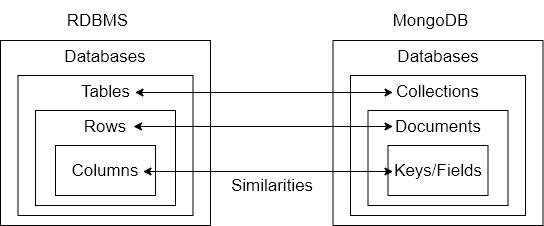

### Datatypes
MongoDB stores documents using Binary JSON (BSON) therefore the documents looks highly similar to the dictionary datatype in Python. <br>
It also has several datatypes:
* **Strings** - UTF-8 encoded characters. Because the storage uses JSON string format, all strings are enclosed in **double quotes**

* **Numbers** - JSON's basic data type therefore it does not specify whether it is a integer, float, or long but MongoDB supports all that and the 128-bit floating point decimal.

* **Booleans** - `true` or `false`, take not of the **letter case**

* **Objects** - they are used to represent a document. This document can be nested or embedded (an object that is the value of a field). 

* **Arrays** - a collection of zero or more values. Although in MongoDB, there is no limit of the number of elements an array can contain or how many arrays a document can have, the overall document size should not exceed 16MB. Each element of an array can be accessed using index position using the square brackets (`[]`). **Indexes are always zero-based.**

* **Null** - denotes that a field does not contain a value.

* **ObjectId** - this is the unique value (`_id`) that MongoDB uses to identify each document. It has the same function as the `primary key` in the RDBMS. The value of the `_id` field must be **unique** in a collection. By default, the `_id` field is a unique value, 12 bytes long, it can be replaced with other values based on organizational rules.

* **Dates** - since the JSON specifications do not support date types, all dates are represented as plain strings. Because date as strings are difficult to work with, we can use the `Date()` (local time zone) or `ISODate()` (UTC) to create the date.

* **Timestamps** - 64-bit representation of date and time. The timestamp type is exclusively used by MongoDB for internal operations.

* **Binary Data**- also called `BinData`, is a BSON datatype for storing data that exists in a binary format. This datatype gives you the ability to store almost anything in the database, including files such as text, videos, music, and more.

* **Regular Expression** - stores regular expressions of the format PCRE (Perl Compatible Regular Expressions)

* **Code** - this represents JavaScript code.

Some times it may be hard to check all the brackets of your JSON document therefore we can use any online JSON validator like [jsonlint](https://jsonlint.com/) to validate our JSON syntax.

### Nesting depth limit
MongoDB's BSON document supports nesting up to 100 levels however, the higher the nesting levels the more issues with performance and memory will arise. One solution is to split the collections into two.

### Field name Rules
1. field names cannot contain `NULL` character
2. top-level fields name cannot start with a dollar sign (`$`) or period (`.`)
3. field names are unique

### CRUD

#### Insert Functions
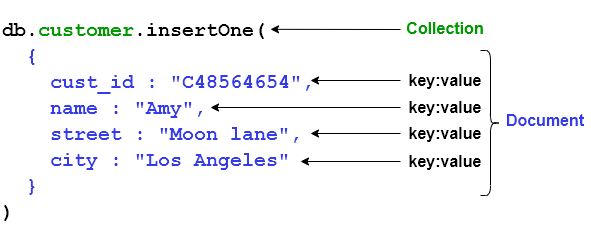
* 2 functions that we can use `insertOne()` & ` insertMany()`
* the `_id` field is automatically filled if the document does not have it as one of the document fields
* caveat is that there is very little validation therefore the most common mistake the is the insertion of documents into misspelled collections. Most of the validation has to be handled by the application program

#### Delete Functions
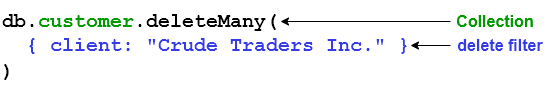
* 2 functions for deleting documents: `deleteOne()` & `deleteMany()`
* 1 function for deleting a collection: `drop()`
* 1 function to delete the database: `dropDatabase()`
* requires a filter to "find" the document for deletion

#### Update Functions
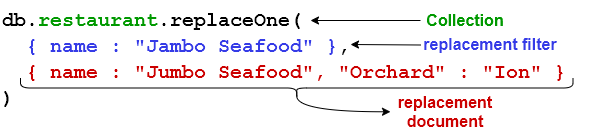<br>
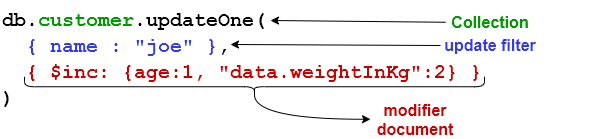
* 2 method types, either replacing the whole document or updating fields in the document
* for updating fields in a document: `updateOne()` & `updateMany()`
* for replacing whole document: `replaceOne()`
* both functions require a filter to "find" the document for updating.
* `_id` fields are immutable
* for updating fields, we were introduced some operators like
 * `$inc` - increments the value of the key by the specified amount
 * `$mul` - multiplies the value of the key by the specified amount
 * `$rename` - rename the key
 * `$set` - sets value of the key or add the key-value pair if the pair is not in the document
 * `$unset` - removes the key from the document
 
#### Query Functions
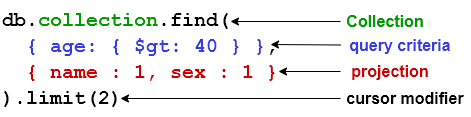
* 2 functions: `findOne()` (returns a `cursor` object) & `find()`
* requires a query criteria to find the document and a projection document to specify which fields to return from the document
* use the `pretty()` to print well-formatted results returned from the query functions
* conditional operators can be used in the query criteria
 * `$eq` or `$ne` - equality checking
 * `$gt` or `$gte` or `$lt` or `$lte` - comparison operators
 * `$in` or `$nin` - matches values of fields to at least one of the given values in the specified array
* logical operators can be used in the query criteria
 * `$and`, `$or`, `$nor` & `$not`
* can limit, skip or sort the results

---
## A Titbit about MongoDB Database Tools

These are the set of command-line utilities (which can be downloaded [here](https://www.mongodb.com/try/download/database-tools)) used for working with MongoDB deployment. The tools helps with importing and exporting of data, diagostic tools and manipulation of files in gridfs objects of your MongoDB instance. The ones that you could be using pretty often are the importing and exporting of data tools.

For this lecture and subsequence exercise, we will be importing data from 2 different file formats: JSON and BSON. The tools that we will need are the `mongorestore` and `mongoimport`.

* **`mongorestore`** - is used for importing data from **folders or single BSON file formats**. These files are produced via the tool `mongodump`. The most common way to use this command is: 

  ```bash
  mongorestore --db=<db_name> <full path to bson file/s or directory>
   
  # with specific collection 
  mongorestore --db=<db_name> --collection=<collection_name> <full path to bson file/s>
  ```
  
  <br>
  
* **`mongoimport`** - is used for importing data from **single JSON, CSV & TSV file formats**. The most common way to use this command is:
  
  ```bash
  mongoimport --db=<db_name> --collection=<collection_name> --file=<file path>
  
  # if file type is specified 
  mongoimport --db=<db_name> --collection=<collection_name> --type=<json|csv|tsv> --file=<file path>
  ```

Other useful commands to use are:
* **`mongodump`** - Creates a **binary** export of the contents of the database.
* **`bsondump`** - Converts bson dump files into json.
* **`mongoexport`** - Produces a `json` or `csv` export of data stored in a database instance.

More information about the commands can be found [here](https://docs.mongodb.com/database-tools/)

---
## Aggregation Framework

In RDBMS we have learnt what are aggregation functions, stored functions, stored procedures and triggers but are there equivalent in MongoDB? Triggers and functions are available in MongoDB Realm but the language used is **JavaScript** and thus out of scope. If you would like to read up further on this topic, the documentation for MongoDB Realm is available [here](https://docs.mongodb.com/realm/). At current, there is no equivalent of stored procedures for MongoDB.

MongoDB does have an Aggregation Framework where we can use to perform analytics on documents in one or more collections using MongoDB's set of analytics tools. Being a framework, it means that it had to be built on top of some underlying structure and this structure is modeled upon the concept of data processing pipelines. A pipeline is a set of data processing stages connected in a series where the output data of each stage is the input data of the next stage.

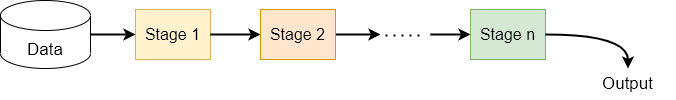

With the aggregation pipeline, the `data` is the documents from 1 or more collections and this data is then passed through 1 or more stages where at each stage, a different operation is performed. The output produced at the end of each stage resembles documents returned from a `find()` query function. However, it is not a `cursor` object that is returned but a stream of documents which will be fed as inputs to the next stage in the pipeline.

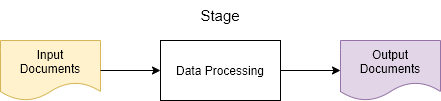

The operation at each stage are able to transform or filter the documents or even generate new documents therefore it is not always right to say that each stage produces 1 output document for every input document. Occasionally, some stages are executed multiple times as this helps to filter out unnecessary data being passed along the pipeline.

### Getting Started

Let's start by working through examples. The following is a snapshot of part of a single document in a collection called `companies`, each document holds details about the company, its funding efforts and whether or not it has an initial public offering (IPO).

```json
{
  "_id" : "52cdef7c4bab8bd675297d8e",
  "name" : "Facebook",
  "category_code" : "social",
  "founded_year" : 2004,
  "description" : "Social network",
  "funding_rounds" : [{
      "id" : 4,
      "round_code" : "b",
      "raised_amount" : 27500000,
      "raised_currency_code" : "USD",
      "funded_year" : 2006,
      "investments" : [
        {
          "company" : null,
          "financial_org" : {
            "name" : "Greylock Partners",
            "permalink" : "greylock"
          },
          "person" : null
        },
        {
          "company" : null,
          "financial_org" : {
            "name" : "Meritech Capital Partners",
            "permalink" : "meritech-capital-partners"
          },
          "person" : null
        },
        {
          "company" : null,
          "financial_org" : {
            "name" : "Founders Fund",
            "permalink" : "founders-fund"
          },
          "person" : null
        },
        {
          "company" : null,
          "financial_org" : {
            "name" : "SV Angel",
            "permalink" : "sv-angel"
          },
          "person" : null
        }
      ]
    },
    {
      "id" : 2197,
      "round_code" : "c",
      "raised_amount" : 15000000,
      "raised_currency_code" : "USD",
      "funded_year" : 2008,
      "investments" : [
        {
          "company" : null,
          "financial_org" : {
            "name" : "European Founders Fund",
            "permalink" : "european-founders-fund"
          },
          "person" : null
        }
      ]
    }],
  "ipo" : {
    "valuation_amount" : NumberLong("104000000000"),
    "valuation_currency_code" : "USD",
    "pub_year" : 2012,
    "pub_month" : 5,
    "pub_day" : 18,
    "stock_symbol" : "NASDAQ:FB"
  }
}
```

The aggregate syntax begins with the `aggregate` command that operates on a collection like the other CRUD commands.

```
db.companies.aggregate(pipeline, options)
```
where 
* **`pipeline`** parameter is an array of "stages" that the data will go through. Each stage in the pipeline is **completed independently**, one after another, until none are remaining. The resulting data after the final stage is stored in a `cursor` and returned to you.
* **`options`** parameter is an optional document consisting of details such as how the aggregation should execute or some flags that are required during debugging and building your pipelines.

Lets start with a filter that returns all companies founded in `2005`:
```
db.companies.aggregate([
    { $match: {founded_year: 2005}},
]}
```

Some of you may notice that this operation is the same as the `find()` function on the collection. Next we are going to add a project stage to the pipeline.

```
db.companies.aggregate([
    { $match: {founded_year: 2005}},
    { $project: {_id: 0, name: 1, founded_year: 1}}
])
```

Running is command will produce a very long output like so
```json
{ "name" : "Zoho", "founded_year" : 2005 }
{ "name" : "Omnidrive", "founded_year" : 2005 }
{ "name" : "Wetpaint", "founded_year" : 2005 }
{ "name" : "Helio", "founded_year" : 2005 }
{ "name" : "Jingle Networks", "founded_year" : 2005 }
{ "name" : "Wesabe", "founded_year" : 2005 }
{ "name" : "LifeLock", "founded_year" : 2005 }
{ "name" : "Jangl SMS", "founded_year" : 2005 }
{ "name" : "Jajah", "founded_year" : 2005 }
{ "name" : "YouTube", "founded_year" : 2005 }
{ "name" : "Revision3", "founded_year" : 2005 }
{ "name" : "iSkoot", "founded_year" : 2005 }
{ "name" : "ClipBlast!", "founded_year" : 2005 }
{ "name" : "Zlio", "founded_year" : 2005 }
{ "name" : "Instructables", "founded_year" : 2005 }
{ "name" : "Dailymotion", "founded_year" : 2005 }
{ "name" : "Swivel", "founded_year" : 2005 }
{ "name" : "Netvibes", "founded_year" : 2005 }
{ "name" : "RockYou", "founded_year" : 2005 }
{ "name" : "Bebo", "founded_year" : 2005 }
Type "it" for more
```

Now that we know that there is a lot of companies founded in the year 2005, we would like to limit that output to let's say 5 documents.
```
db.companies.aggregate([
    { $match: {founded_year: 2005}},
    { $limit: 5},
    { $project: {_id: 0, name: 1, founded_year: 1}}
])
```

Notice how the `$limit` stage is placed before the `$project` stage. The reason for that is because we want to cut down the number of documents being passed to the `$project` stage. If the stages were switched, in this case it would not make a difference on the results but internally, the `$project` stage with have to go through hundreds of documents before limiting it to 5 for display. When it comes to aggregation pipelines in MongoDB, efficiency of your pipeline should be your top priority. 

Let's add another 2 more stages `$sort` and `$skip` to only get the next 5 companies after the 10th company when sorted in descending order by name.
```
db.companies.aggregate([
    { $match: {founded_year: 2005}},
    { $sort: {name: -1}},
    { $skip: 10},
    { $limit: 5},
    { $project: {_id: 0, name: 1}}
])
```

Output:
```json
{ "name" : "quietrevolution" }
{ "name" : "obopay" }
{ "name" : "oDesk" }
{ "name" : "mywaves" }
{ "name" : "myThings" }
```

### Pipeline In-Depth

The aggregation pipeline is not just limited to those stages. A full list of aggregation pipeline stages can be found [here](https://docs.mongodb.com/manual/reference/operator/aggregation-pipeline/). Within a stage, we can also add different [expressions](https://docs.mongodb.com/manual/reference/operator/aggregation/). The popular ones are:

* **Boolean** expressions allow us to use `AND`, `OR`, and `NOT` expressions.
* **Set** expressions allow us to work with arrays as sets. In particular, we can get the intersection or union of two or more sets. We can also take the difference of two sets and perform a number of other set operations.
* **Comparison** expressions enable us to express many different types of range filters.
* **Arithmetic** expressions enable us to calculate the ceiling, floor, natural log, and log, as well as perform simple arithmetic operations like multiplication, division, addition, subtraction and even square root of a value.
* **String** expressions allow us to concatenate, find substrings, and perform operations having to do with case and text search operations.
* **Array** expressions provide a lot of power for manipulating arrays, including the ability to filter array elements, slice an array, or just take a range of values from a specific array.
* **Accumulators** provide the ability to calculate sums, descriptive statistics, and many other types of values.
* **Variable** expressions, which we won’t cover too deeply, allow us to work with literals, expressions for parsing date values, and conditional expressions.

#### `$project` stage
More often than not, when working with big datasets, we want to reshape the document into a usable document for us to work with. Looking back at the snapshot of the company details, we want to find the companies that has `greylock` as an initial investor and display nested fields by promoting them. 

```
db.companies.aggregate([
  { $match: {"funding_rounds.investments.financial_org.permalink": "greylock" }},
  { $project: {
    _id: 0, 
    name: 1,
    ipo: "$ipo.pub_year",
    valuation: "$ipo.valuation_amount",
    funders: "$funding_rounds.investments.financial_org.permalink"
  }}
]).pretty()
```

From the code, we can see that in the `$match` stage it is searching for documents with the `permalink` value `greylock`. However in the `$project` stage, the fields `ipo`, `valuation` and `funders` looks different. Those fields have values that are **field paths** into the `ipo` and `funding_rounds` top-level fields in the documents. These values should be interpreted as field paths and thus the field path's value should be projected for each field.

From the output in MongoDB shell, we may see multiple printed out for the `funders` field. In fact, it is an array of arrays. This is because, in our `$project` stage, we specify the `financial_org.permalink` value for each entry in the `investments` array, for every funding round therefore it builds an array of arrays of the funder's names.

#### `$unwind` stage

There will be a lot of instances where you will need to work with array fields in your aggregation pipeline and you may need to "unwind" the array fields to produce a document for each element in a specified array field.

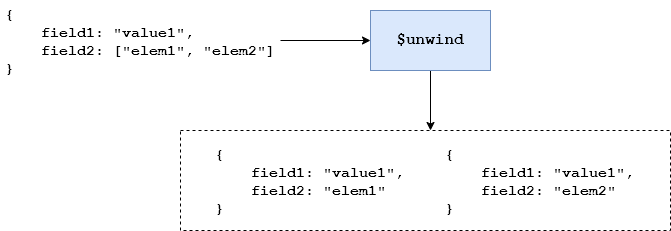

The part that may not be readily apparent to us is that the output of the `$unwind` stage returns the **same number** of documents as there were elements of the array. Each document will have duplicated values for all other fields except `field2` field where it will contain a single value rather than an array value.

**Example: Using `$unwind` stage**<br>

```
db.companies.aggregate([ 
    { $match: {"funding_rounds.investments.financial_org.permalink": "greylock"} }, 
    { $limit: 1}, 
    { $project: { 
        _id: 0, name: 1, 
        amount: "$funding_rounds.raised_amount", 
        year: "$funding_rounds.funded_year" }}
])
```

Going back to our well known aggregate example of the companies where `greylock` had participated in one of the company's funding rounds, we are now going to see what happens when the `$unwind` stage is applied to the pipeline. We will first limit the output to 1 document for ease of demonstration. Just from the field `funding_rounds` (from the snapshot above), we can see that it is an array of documents therefore the above aggregate pipeline will output for the company, their `raised_amount` and `funded_year` for every element in the `funding_rounds` array.

```
{
        "name" : "Digg",
        "amount" : [
                8500000,
                2800000,
                28700000,
                5000000
        ],
        "year" : [
                2006,
                2005,
                2008,
                2011
        ]
}
```
When we add the `$unwind` stage, we are specifying which field to unwound, in this case, we shall use the `funding_rounds` field.

```
db.companies.aggregate([ 
    { $match: {"funding_rounds.investments.financial_org.permalink": "greylock"} }, 
    { $limit: 1}, 
    { $unwind: "$funding_rounds"}, 
    { $project: { 
        _id: 0, name: 1, 
        amount: "$funding_rounds.raised_amount", 
        year: "$funding_rounds.funded_year" }} 
])
```

In other words, the output above will be broken up into 4 documents each with duplicated field values except the for the elements in the arrays (that are within the `funding_rounds`), they will be separated into 1 document each. 

```
{ "name" : "Digg", "amount" : 8500000, "year" : 2006 }
{ "name" : "Digg", "amount" : 2800000, "year" : 2005 }
{ "name" : "Digg", "amount" : 28700000, "year" : 2008 }
{ "name" : "Digg", "amount" : 5000000, "year" : 2011 }
```

Bear in mind that the `$unwind` stage only unwinds the particular field given to it, it does not unwind the other nested fields within the specified given field. Enter the following aggregate function to see the difference.

```
db.companies.aggregate([ 
    { $match: {"funding_rounds.investments.financial_org.permalink": "greylock"} }, 
    { $limit: 1}, 
    { $unwind: "$funding_rounds"}, 
    { $project: { 
        _id: 0, name: 1, 
        amount: "$funding_rounds.raised_amount", 
        year: "$funding_rounds.funded_year",
        investor: "$funding_rounds.investments" }}
])
```

The output from the aggregate function above also includes the documents that `greylock` isn't the investor of (after the split), this can be seen from the document with the year `2011` for the company `Digg`. To prevent that we would have to add 1 more `$match` stage to after the `$unwind` stage to guarantee that the matched documents (after unwinding) only contains the documents where `greylock` participated in at least one funding round. Our final aggregate function is now

```
db.companies.aggregate([ 
    { $match: {"funding_rounds.investments.financial_org.permalink": "greylock"} }, 
    { $limit: 1}, 
    { $unwind: "$funding_rounds"},
    { $match: {"funding_rounds.investments.financial_org.permalink": "greylock"} }, 
    { $project: { 
        _id: 0, name: 1, 
        amount: "$funding_rounds.raised_amount", 
        year: "$funding_rounds.funded_year",
        investor: "$funding_rounds.investments" }}
])
```

From this final aggregate function, we can see that we can include multiple stages of the same type in a pipeline to further filter the number of documents produced from each stage. In this case, we have further filtered out via the individual years of when `greylock` has participated in the company's funding round.

#### Array Expressions

These are expression that are used in the `$project` stages. The full range of array expressions can be found [here](https://docs.mongodb.com/manual/reference/operator/aggregation/#array-expression-operators) but we will be looking at 4 common array expressions and variables in aggregation expressions:
* `$filter` - Selects a subset of the array to return an array with only the elements that match the filter condition.
* `$arrayElemAt` - Returns the element at the specified array index.
* `$slice` - Returns a subset of an array.
* `$size` - Returns the number of elements in the array. Accepts a single expression as argument.

We will still be using `companies` database to demonstrate these operators.

**`$filter`** <br>
Let's create a filter that filters out the companies that had the investor `goldman-sachs` investing more than 100 million in one of their funding rounds.

```
db.companies.aggregate([
  { $match: {"funding_rounds.investments.financial_org.permalink": "goldman-sachs"} },
  { $project: {
    _id: 0,
    name: 1,
    founded_year: 1,
    rounds: { $filter: {
      input: "$funding_rounds",
      as: "round",
      cond: { $gte: ["$$round.raised_amount", 100000000] } } }
  } },
  { $match: {"rounds.investments.financial_org.permalink": "goldman-sachs" } },
]).pretty()
```

From the above aggregate function, we can see that the `$filter` expression is located in the `rounds` field. The `$filter` operator to work with array fields and has the general syntax

```
{ $filter: { input: <array>, as: <string>, cond: <expression> } }
```
where
* `input` - is the field with the array value.
* `as` - an optional parameter that gives a name to the variable that represents each individual element in the `input` array.
* `cond` - this expression has to resolve to a boolean value so as to determine if the element should be included in the output array.

In the `$filter` expression above, we are filtering the array values in the field `funding_rounds` for the investors that had invested above 100 million. Within that condition, we see the double dollar sign (`$$`), this is used to reference the variable defined within the expression we're working in (in this case, it is the `round` variable that was defined in the `as` clause). 

The condition (greater than or equal) for this filter takes in 2 values:
1. the element of array
2. the value that the element of the array is comparing against

Like the previous, section on `$unwind`, the second `$match` stage is used to filter the input documents from the `$project` stage for documents that had funding from `goldman-sachs` in some way.

**`$arrayElemAt`**<br>
The next operator allows us to extract elements from an array via indexing. Remember that arrays in MongoDB starts with a 0 index all the way to `n-1` where `n` is the size of the array. Similar to Python, the last element of the array is also identified with `-1` (just in case that we do not know the size of the array) and negative indexing is also available. 

In the following aggregation function, we are pulling out the first and last round of funding given to all companies that was founded in the year 2010. 

```
db.companies.aggregate([
  { $match: {"founded_year": 2010} },
  { $sort: {name:-1}},
  { $limit: 1},
  { $project: {
    _id: 0,
    name: 1,
    founded_year: 1,
    first_round: { $arrayElemAt: [ "$funding_rounds", 0 ] },
    last_round: { $arrayElemAt: [ "$funding_rounds", -1 ] }
  } }
]).pretty()
```

Where the `$arrayElemAt` operator is used for the `first_round` & `last_round` fields and has the general syntax 

```
{ $arrayElemAt: [ <array>, <idx> ] }
```
where
* `array` - is the either a field or expression that resolves to an array.
* `idx` - either a positive or negative integer that resolves to an index in the array. Positive indexes count from the start and negative indexes count from the end.

A close relation to the `$arrayElemAt` operator is the **`$slice`** operator. This operator allows us to return not just one but multiple items from an array in a sequence, beginning with a particular index. This operator also has 2 general syntax

```
{ $slice: [ <array>, <n> ] }  # returns elements from either the start or end of the array:

{ $slice: [ <array>, <position>, <n> ] }  # returns elements from the specified position in the array
```

Continuing from the previous aggregation function, instead of pulling out the only the first and last funding rounds, we are going to pull out first 3 funding rounds of all companies that was founded in 2010.

```
db.companies.aggregate([
  { $match: {"founded_year": 2010} },
  { $project: {
    _id: 0,
    name: 1,
    founded_year: 1,
    early_round: { $slice: [ "$funding_rounds", 1, 3 ] }
  } }
]).pretty()
```

The last operation that is most commonly used with arrays is the **`$size`** operation. This operator helps determine the size (or length) of the array. For example, we would like to find the number of `funding_rounds` each company has gone through in the year 2004:

```
db.companies.aggregate([
  { $match: {"founded_year": 2004} },
  { $project: {
    _id: 0,
    name: 1,
    founded_year: 1,
    total_rounds: { $size: "$funding_rounds" }
  } }
]).pretty()
```

### Accumulators

Now that we have seen various different types of commonly used array expressions and stages, we are now going to look at accumulators. Accumulators another type of expression that are used to calculate values from field values found in both single and multiple documents. Before MongoDB 3.2, accumulators were available only in the `$group` stage but in MongoDB 3.2 a subset of accumulators were available to be access in the `$project` stage.

Accumulators are operators such as

| Field/multi doc Accumulators | Array Accumulators |
|:---|:---|
| `$sum` | `$push` |
| `$avg` | `$addToSet` |
| `$first` & `$last` | |
| `$min` & `$max` | |
| `$mergeObjects` | |

The difference between the `$group` stage and `$project` stage accumulators are the type of documents they work on. `$project` stage accumulators work on arrays within a single document whereas `$group` stage accumulators allows us the ability to perform calculations on values across multiple documents.

For example, if we would like to find the maximum funding amount raised in each company's `funding_rounds` field and for which the array is not empty, the aggregation function would be
```
db.companies.aggregate([
  { $match: { "funding_rounds": { $exists: true, $ne: [ ]} } },
  { $project: {
    _id: 0,
    name: 1,
    largest_round: { $max: "$funding_rounds.raised_amount" }
  } }
])
```

Remember that `$project` stage accumulators only work on fields that has arrays as values a single document therefore we can reach into an embedded document and check its values. Another example is to sum all raised amounts for each company who have went through some fundings.

```
db.companies.aggregate([
  { $match: { "funding_rounds": { $exists: true, $ne: [ ]} } },
  { $project: {
    _id: 0,
    name: 1,
    total_funding: { $sum: "$funding_rounds.raised_amount" }
  } }
])
```

### Introduction to Grouping

In the previous section, we have mentioned that accumulators have always been used in `$group` stages. These `$group` stages are similar to the SQL equivalent of the `GROUP BY` command. In the `$group` stage, we are essentially grouping values from multiple documents and perform some type of aggregation operation on them, such as find the average of a field.

The general syntax for the `$group` stage is
```
{
  $group:
    {
      _id: <expression>, // Group By Expression
      <field1>: { <accumulator1> : <expression1> },
      ...
    }
 }
```
where
* `_id` - is a mandatory required value consisting of `Null` or any other constant value where it can use this value to group all the input documents as a whole.
* `field` - optional field to add more accumulator operators.

A simple group by expression is in the form of an expression to group the companies by the year they were founded: <br>
`_id: { founded_year: "$founded_year" }`

Using this expression, we can add other accumulator operators such as to calculate the average number of employees since the year the company was founded.

```
db.companies.aggregate([
  { $group: {
    _id: { founded_year: "$founded_year" },
    avg_number_of_employees: { $avg: "$number_of_employees" }
  } },
  { $sort: { avg_number_of_employees: -1 } }

])
```

The way that the `$group` stage works is that each time it encounters a document with a specific `founding_year`, it adds the value for `number_of_employees` from that document to a running sum of the number of employees and adds one to a count of the number of documents seen so far for that year. Once all documents have passed through the `$group` stage, it can then calculate the average using that running sum and count for every grouping of documents it identified based on the year of founding.

The aggregation function above deals with only 1 field for multiple documents, what happens if we need to have more than 1 field? We add it them to the expression. For example, we would like to find out all the company's name that were founded after 2010 and also group them via their business type (aka `category_code`).

```
db.companies.aggregate([
  { $match: { founded_year: { $gte: 2010 } } },
  { $group: {
    _id: { founded_year: "$founded_year", category_code: "$category_code" },
    companies: { $push: "$name" }
  } },
  { $sort: { "_id.founded_year": 1 } }
]).pretty()
```

The new aggregation operator seen here is the `$push` operator that adds the resulting value to an array each time a document is processed by the `$group` stage. In this case, it builds an array of company names. The `_id` expression can also consist of a field path to an embedded document like so

```
db.companies.aggregate([
  { $group: {
    _id: { ipo_year: "$ipo.pub_year" },
    companies: { $push: "$name" }
  } },
  { $sort: { "_id.ipo_year": 1 } }
]).pretty()
```

The above aggregation function groups the documents by the publication date of their IPOs, this includes those companies where their `ipo_year` fields are null. We can see this by adding a `$project` stage (to count the number of companies in each group) to the pipeline.

```
db.companies.aggregate([
  { $group: {
    _id: { ipo_year: "$ipo.pub_year" },
    companies: { $push: "$name" }
  } },
  { $sort: { "_id.ipo_year": 1 } },
  { $project: {
    comp_size: {$size: "$companies" }
  } }
]).pretty()
```

The main difference is that the `$group` stage is designed to take an input stream of documents and accumulate values by processing each document in turn vs the `$project` stage which is designed to reshape documents individually.

### Writing Aggregation Pipeline Results to a Collection

Generally after getting our results, we would like to save it somewhere. MongoDB has 2 special stages for this operation: `$out` & `$merge`. **Only one** of these two stages can be used at any point in time and it must be placed at the last stage of an aggregation pipeline.

Depending on the version of MongoDB, the syntax for `$out` differs.<br>
**MongoDB 4.4 onwards**

```
{ $out: { db: "<output-db>", coll: "<output-collection>" } }
```

The `$out` stage for MongoDB 4.4 onwards allows it to accept a document specifying the output database and collection but **before** MongoDB 4.4, it only allows specifying of the collection name `{ $out: "<output-collection>"}`.

The `$merge` stage is **only available from MongoDB 4.2 onwards** and the syntax is
```
{ $merge: {
     into: <collection> -or- { db: <db>, coll: <collection> },
     on: <identifier field> -or- [ <identifier field1>, ...],  // Optional
     let: <variables>,                                         // Optional
     whenMatched: <replace|keepExisting|merge|fail|pipeline>,  // Optional
     whenNotMatched: <insert|discard|fail>                     // Optional
} }
```

Example:
`{ $merge: { into: "myOutputColl", on: "_id", whenMatched: "replace", whenNotMatched: "insert" } }`

A simpler form if you are only required to write to a collection in the same database is<br>
`{ $merge: <output-collection> }`

### Similarities with SQL Terms

From the MongoDB [documentation](https://docs.mongodb.com/manual/reference/sql-aggregation-comparison/)

| SQL Terms, Functions, and Concepts | MongoDB Aggregation Operators |
|:---|:---|
| WHERE | `$match` |
| GROUP BY | `$group` |
| HAVING | `$match` |
| SELECT | `$project` |
| ORDER BY | `$sort` |
| LIMIT | `$limit` |
| SUM() | `$sum` |
| COUNT() | `$sum` or `$sortByCount` |
| JOIN | `$lookup` |
| SELECT INTO NEW TABLE | `$out` |
| MERGE INTO TABLE | `$merge` MongoDB 4.2 onwards |
| UNION ALL | `$unionWith` MongoDB 4.4 onwards |

## Database Security

After the databases have been created, the next step is to employ security measures such as authorizations, authentications and transport layer encryption. 

MongoDB has even provided a list of security measures that you should implement to protect your MongoDB installation.
* Enable Access Control and Enforce Authentication
* Configure Role-Based Access Control
* Encrypt Communication (TLS/SSL)
* Encrypt and Protect Data
* Limit Network Exposure
* Audit System Activity
* Run MongoDB with a Dedicated User
* Run MongoDB with Secure Configuration Options
* Request a Security Technical Implementation Guide (where applicable)
* Consider Security Standards Compliance

Of all the security measures from the list, we will only be going through the first 2 points as the other points are hardware systems related and network related which requires sound networking knowledge which is not the aim of this course.

### Authentications

Authentication is the process of verifying the identity of the client when authorization has been enabled. Although authentication and authorization are closely related, do not confuse them. Authentication verifies the **identity** of the user and authorization determines if the verified user **has access to** the resources and operations. Authentications are done via a *username*, *password* and the authentication database (the database that the user has access to and stores its *username*) associated with the user. Note that if a single user is to have access to multiple databases, create this user with roles applicable to the various databases instead of creating multiple same users for the different databases.

MongoDB supports the authentication mechanisms called Salted Challenge Response Authentication Mechanism (SCRAM) by default and x.509 Certificate Authentication that clients can use to verify their identities. The workings of both mechanisms are beyond the scope of this course but if you would like to read more about them, it can be found [here](https://docs.mongodb.com/manual/core/authentication/).

Users can be created in MongoDB via the `db.createUser()` method. Once a user is created, roles can be granted or revoked as required (we will see this in the next section). Created users are all stored in a specific database called the authentication database. This authentication database is part of the database that user has access to. In other words, if a user is created for the `test` database, the `test` database is the authentication database. However, it is not uncommon for a user to have privileges across different databases, this can be achieved by assigning specially created user roles to this user.

The combination of user’s name and authentication database serve as a unique identifier for the user therefore if two users have the same name but are created in different databases, they are two separate users. However, if a user requires permissions to multiple databases, it is better to create this user with roles in the applicable databases instead of creating this user multiple times in different databases.

### Authorizations

Authorizations are normally given to users (be they application or organization staff) based on their roles called Role-Based Access Control (RBAC). Users are granted 1 or more roles that determines their access to databases and operations. MongoDB **does not** have authorization enabled **by default** but in most organizations, the systems/database administrator will have it enabled. Lets run through some terminologies

* **Roles** - they grant privileges to perform specified actions on resources (ie: databases or clusters). Each privilege is either specified explicitly in the role or inherited from another role or both.

* **Privileges** - consists of specified resource/s and the actions allowed on the resource/s. A resource is defined as a database, collection, set of collections or the cluster. An action is defined as the operation allowed to perform on the resource, eg: CRUD operations, database management, deployment management, etc.

* **Inherited Privileges** - as roles can be inherited from 1 or more existing roles, the inherited role also inherits the privileges from those roles. A role can also inherit privileges from other roles in its database. Example, a role created in the `admin` database can inherit privileges from roles in any databases.

There are 2 types of roles, namely **Built-In** & **User-Defined**. Examples of built-in roles are `read`, `readWrite`, `dbAdmin`, `dbOwner`, etc. Each of these roles have grants certain privileges to the user. To view the privileges for a particular role, use the `db.runCommand()` function of the database functions with a document containing `rolesInfo` with keys `showPrivileges` and `showBuiltinRoles` set to `true`.

```
db.runCommand(
  {
    rolesInfo: { role: <name>, db: <db> },
    showPrivileges: <Boolean>,
    showBuiltinRoles: <Boolean>,
    comment: <any>
  } )
```

Try typing the following command into your mongo shell.
```
db.runCommand(
  {
    rolesInfo: { role: "dbAdmin", db: "test" },
    showPrivileges: true,
    showBuiltinRoles: true
  } )
```

Roles can be assigned when the users are created and can be updated to grant or revoke roles. 

```
db.getSiblingDB("products").createUser(
  {
    user: "accountUser",
    pwd: passwordPrompt(),
    roles: [ 
       { role: "readAnyDatabase", db: "admin" },
       "readWrite", "backup" 
       ]
  } )
```

For example, above shows how a user is created with the built-in role of `readWrite` & `backup` roles for the `products` database and `readAnyDatabase` role for the `admin` database. This user will be able to perform *read* and *write* operations on all `products` related collections and perform *backup* operations on the `products` database. In addition, this user is only able to *read* all databases except the `local` and `config` databases.

There are several built-in roles available from MongoDB and database administrators can also create new user-defined roles using the `db.createRole()` function from the database functions should the built-in roles not fit the desired set of privileges. In order to create a user-defined role in a database, the user must have a role with the privileges `createRole` and `grantRole` in their list of privileges. Built-in roles such as `userAdmin` and `userAdminAnyDatabase` will have those privileges by default.

Managing the roles and user-defined roles are done via database functions such as `db.grantRolesToUser()`, `db.revokeRolesFromUser()`, `db.grantPrivilegesToRole()`, `db.revokePrivilegesFromRole()`, etc. For example referring to the codes below, the role `inventoryCntrl01` is being granted the `insert` privilege for the database `products` on all collections except the collections with the namespace `systems` (aka non-system collections) and the `find` privilege is granted only for the collection named `system.js` on the same database. The last document `{ w: "majority" }` refers to the `writeConcern` parameter which determines the level of acknowledgment requested from MongoDB. Generally the value for `writeConcern` would be determined by the database administrator as it would require knowledge on how MongoDB has been setup within the organization. For local setup, the value `majority` is fine. 

```
db.grantPrivilegesToRole(
  "inventoryCntrl01",
  [
    {
      resource: { db: "products", collection: "" },
      actions: [ "insert" ]
    },
    {
      resource: { db: "products", collection: "system.js" },
      actions: [ "find" ]
    }
  ],
  { w: "majority" }
)
```

---
## Summary
* MongoDB (Recap)
 * Datatypes
 * CRUD
* Aggregation Framework
 * Pipeline In-Depth - looked at some stages like `$project`, `$unwind`, `$match`, etc
 * Accumulators - 2 types, for use mainly in the `$group` stage but a small subset are available for the `$project` stage
 * Introduction to Grouping 
 * Writing Aggregation Pipeline Results to a Collection - learnt about the `$out` & `$merge` stages and their differences
 * Similarities with SQL Terms
* Database Security
 * Authentications & Authorizations